In [1]:
!pip install tensorflow-gpu==2.0

In [1]:
%tensorflow_version 2.x
import tensorflow as tf

print(tf.__version__)

TensorFlow 2.x selected.
2.0.0


In [0]:
# Creating the inception model
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

def get_inception_constructor(
    name,
    filter_1x1,
    filter_3x3,
    filter_3x3_reduce,
    filter_5x5,
    filter_5x5_reduce,
    filter_pooling,
  ):
  def model(input_data):
    # The default stride is (1,1) which is what we want
    path_1 = Conv2D(filter_1x1, (1, 1), padding='same', activation='relu')(input_data)

    # This gives 64 filters. is that right?
    path_2 = Conv2D(filter_3x3_reduce, (1, 1), padding='same', activation='relu')(input_data)
    path_2 = Conv2D(filter_3x3, (3, 3), padding='same', activation='relu')(path_2)

    path_3 = Conv2D(filter_5x5_reduce, (1, 1), padding='same', activation='relu')(input_data)
    path_3 = Conv2D(filter_5x5, (5, 5), padding='same', activation='relu')(path_3)

    path_4 = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(input_data)
    path_4 = Conv2D(filter_pooling, (1, 1), padding='same', activation='relu')(path_4)

    output = keras.layers.concatenate([path_1, path_2, path_3, path_4], axis=3, name=name)
  
    return output
  return model

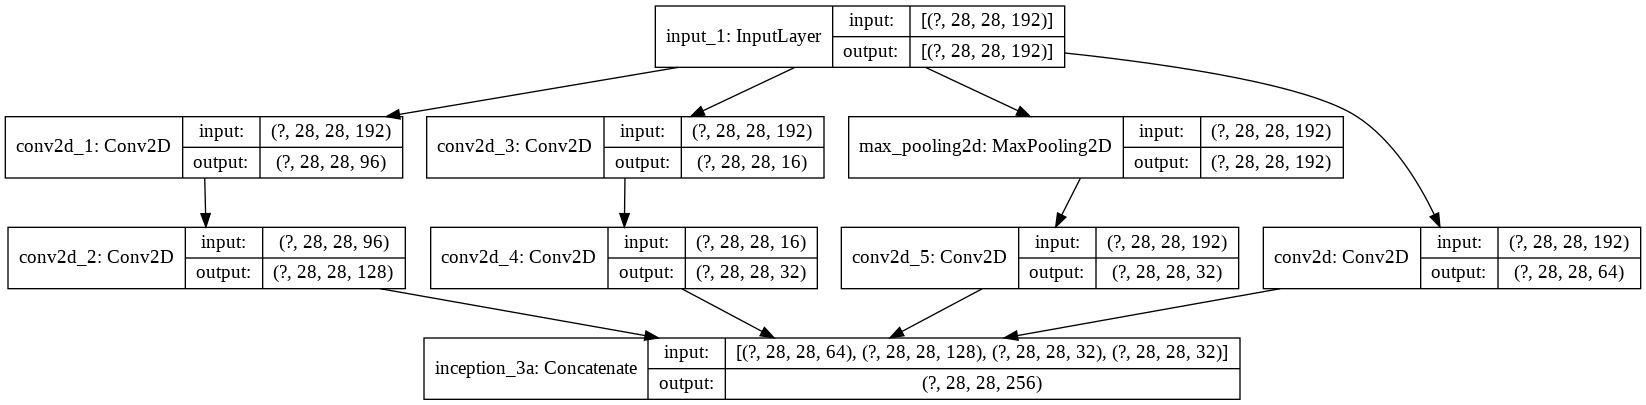

In [4]:
from tensorflow.keras import utils
inception_test = get_inception_constructor(    
    name="inception_3a",
    filter_1x1 = 64,
    filter_3x3 = 128,
    filter_3x3_reduce = 96,
    filter_5x5 = 32,
    filter_5x5_reduce = 16,
    filter_pooling = 32)

in_data = Input((28,28,192))
output = inception_test(in_data)

model = Model(in_data, output)
model.compile('adam', 'mse', metrics=['acc'])
utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, expand_nested=True)

This verifies that we are getting the same size of the elements that is expected from the first inception cell called 3a in the paper by google (28x28x256).

In [0]:
# Lets create all the inception cells that we will need in the lab:

#### 3
inception_3a = get_inception_constructor(    
    name="inception_3a",
    filter_1x1 = 64,
    filter_3x3 = 128,
    filter_3x3_reduce = 96,
    filter_5x5 = 32,
    filter_5x5_reduce = 16,
    filter_pooling = 32)

inception_3b = get_inception_constructor(    
    name="inception_3b",
    filter_1x1 = 128,
    filter_3x3 = 192,
    filter_3x3_reduce = 128,
    filter_5x5 = 96,
    filter_5x5_reduce = 32,
    filter_pooling = 64)

#### 4
inception_4a = get_inception_constructor(    
    name="inception_4a",
    filter_1x1 = 192,
    filter_3x3_reduce = 96,
    filter_3x3 = 208,
    filter_5x5_reduce = 16,
    filter_5x5 = 48,
    filter_pooling = 64)


inception_4b = get_inception_constructor(    
    name="inception_4b",
    filter_1x1 = 160,
    filter_3x3_reduce = 112,
    filter_3x3 = 224,
    filter_5x5_reduce = 24,
    filter_5x5 = 64,
    filter_pooling = 64)

inception_4c = get_inception_constructor(    
    name="inception_4c",
    filter_1x1 = 128,
    filter_3x3_reduce = 128,
    filter_3x3 = 256,
    filter_5x5_reduce = 24,
    filter_5x5 = 64,
    filter_pooling = 64)

inception_4d = get_inception_constructor(    
    name="inception_4d",
    filter_1x1 = 112,
    filter_3x3_reduce = 144,
    filter_3x3 = 288,
    filter_5x5_reduce = 32,
    filter_5x5 = 64,
    filter_pooling = 64)

inception_4e = get_inception_constructor(    
    name="inception_4e",
    filter_1x1 = 256,
    filter_3x3_reduce = 160,
    filter_3x3 = 320,
    filter_5x5_reduce = 32,
    filter_5x5 = 128,
    filter_pooling = 128)

#### 5
inception_5a = get_inception_constructor(    
    name="inception_5a",
    filter_1x1 = 256,
    filter_3x3_reduce = 160,
    filter_3x3 = 320,
    filter_5x5_reduce = 32,
    filter_5x5 = 128,
    filter_pooling = 128)

inception_5b = get_inception_constructor(    
    name="inception_5b",
    filter_1x1 = 384,
    filter_3x3_reduce = 192,
    filter_3x3 = 384,
    filter_5x5_reduce = 48,
    filter_5x5 = 128,
    filter_pooling = 128)


In [7]:
input_data = Input((224, 224, 3))

## Initial part
conv1 = Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(input_data)
maxPool1 = MaxPooling2D((3,3), strides=(2,2), padding='same')(conv1)

conv2_reduce = Conv2D(64, (1, 1), padding='same', activation='relu')(maxPool1)
conv2 = Conv2D(192, (3, 3), padding='same', activation='relu')(conv2_reduce)
maxPool2 = MaxPooling2D((3,3), strides=(2,2), padding='same')(conv2)

## First inception layer
inc_3a_out = inception_3a(maxPool2)
inc_3b_out = inception_3b(inc_3a_out)
maxPool3 = MaxPooling2D((3,3), strides=(2,2), padding='same')(inc_3b_out)

# Second inception layer
inc_4a_out = inception_4a(maxPool3)
inc_4b_out = inception_4b(inc_4a_out)
inc_4c_out = inception_4c(inc_4b_out)
inc_4d_out = inception_4d(inc_4c_out)
inc_4e_out = inception_4e(inc_4d_out)
maxPool4 = MaxPooling2D((3,3), strides=(2,2), padding='same')(inc_4e_out)

#inc_4a_out is a parallel output for training here
avgPool4a = AveragePooling2D((5,5), strides=3)(inc_4a_out)
conv4a = Conv2D(128, (1,1), padding='same', activation='relu')(avgPool4a)
fc4a_1 = Dense(1024, activation="relu")(conv4a)
droptout4a = Dropout(0.7)(fc4a_1)
softmax_0 = Dense(1000, activation="softmax", name="softmax0")(droptout4a)

# inc_4d_out is also an output
avgPool4d = AveragePooling2D((5,5), strides=3)(inc_4d_out)
conv4d = Conv2D(128, (1,1), padding='same', activation='relu')(avgPool4d)
fc4d_1 = Dense(1024, activation="relu")(conv4d)
droptout4d = Dropout(0.7)(fc4d_1)
softmax_1 = Dense(1000, activation="softmax", name="softmax1")(droptout4d)

# Third inception layer
inc_5a_out = inception_5a(maxPool4)
inc_5b_out = inception_5b(inc_5a_out)
avgPool5 = GlobalAveragePooling2D()(inc_5b_out)

# After processing
dropout6 = Dropout(0.4)(avgPool5)
linear6 = Dense(1000, activation="relu")(dropout6)
softmax_2 = Dense(1000, activation="softmax", name="softmax2")(linear6)


model = Model(input_data, [softmax_0, softmax_1, softmax_2])
model.compile('sgd', loss=['categorical_crossentropy', 'categorical_crossentropy', 'categorical_crossentropy'], loss_weights=[1, 0.3, 0.3])
model.summary()

# utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_65 (Conv2D)              (None, 112, 112, 64) 9472        input_3[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_14 (MaxPooling2D) (None, 56, 56, 64)   0           conv2d_65[0][0]                  
__________________________________________________________________________________________________
conv2d_66 (Conv2D)              (None, 56, 56, 64)   4160        max_pooling2d_14[0][0]           
____________________________________________________________________________________________

This summary seems to be the correct compared to the paper, even though it is hard to be completely certain that no differences can be found.

In [9]:
%tensorflow_version 2.x
import tensorflow as tf

print(tf.__version__)

from google.colab import drive
drive.mount('/content/drive')

2.0.0
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [10]:
import tensorflow as tf
import os

# We followed the instructions provided by tensorflow here:
# https://www.tensorflow.org/tutorials/text/image_captioning

datazip_zip = tf.keras.utils.get_file('flickr8k.zip',
                                      cache_subdir=os.path.abspath('./cache'),
                                      origin = 'file:///content/drive/My Drive/flickr8k.zip',
                                      extract = True)
annotation_file = os.path.dirname(datazip_zip)+'/flickr_data/Flickr_Data/flickr8ktextfiles/flickr_8k_val_dataset.txt'
images_dir = os.path.dirname(datazip_zip) + '/flickr_data/Flickr_Data/Images/'

print("Annotations: " + annotation_file)
print("Images: " + images_dir)

2285756416/2285754264 [==============================] - 36s 0us/step
Annotations: /content/cache/flickr_data/Flickr_Data/flickr8ktextfiles/flickr_8k_val_dataset.txt
Images: /content/cache/flickr_data/Flickr_Data/Images/


In [11]:
from tensorflow.keras.applications import inception_v3
import tensorflow as tf

# Store captions and image names in vectors
captions = []
images = []

with open(annotation_file, 'r') as f:
    annotations = f.readlines()

for a in annotations[1:]:
    info = a.split("\t")
    images.append(images_dir + info[0])
    captions.append(info[1])

print(images[0] + ": " + captions[0])
print(len(images))
print(len(captions))
print(captions[0])

/content/cache/flickr_data/Flickr_Data/Images/2090545563_a4e66ec76b.jpg: <start> the boy laying face down on a skateboard is being pushed along the ground by another boy . <end>

5000
5000
<start> the boy laying face down on a skateboard is being pushed along the ground by another boy . <end>



In [12]:
# Create the preprocessing function for inception_v3
def inception_preprocess(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (299, 299))
    img = inception_v3.preprocess_input(img)
    img.set_shape((299, 299, 3))
    return img, image_path

# Create the inception model
input_tensor = tf.keras.layers.Input(shape=(299, 299, 3), name="inception_input")
model = tf.keras.applications.InceptionV3(input_tensor=input_tensor, include_top=False, weights='imagenet')
model_out = model.layers[-1].output # Using the second last layer as the output
inception_model = tf.keras.Model(input_tensor, model_out)
inception_model.trainable = False

print(inception_model.input_shape)
print(inception_model.output_shape)

87916544/87910968 [==============================] - 4s 0us/step
(None, 299, 299, 3)
(None, 8, 8, 2048)


In [0]:
!pip install -q tqdm

In [14]:
import numpy as np
from tqdm import tqdm

# Preprocessing the image files. This passes them through
# the pre-processing step and also the network to create a intermediate
# representation.
sorted_images = sorted(set(images))
dataset_img = tf.data.Dataset.from_tensor_slices(sorted_images)
dataset_img = dataset_img.map(
      inception_preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE
    ).batch(16)


for img, path in tqdm(dataset_img):
  batch_features = inception_model(img)
  batch_features = tf.reshape(batch_features,
                              (batch_features.shape[0], -1, batch_features.shape[3]))

  # Cache the images converted/scaled by inception to disk
  for bf, p in zip(batch_features, path):
    path_of_feature = p.numpy().decode("utf-8")
    np.save(path_of_feature, bf.numpy())

63it [00:18,  4.11it/s]


In [15]:
# Tokenizing text  
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=5000,
                                                  oov_token="<unk>",
                                                  filters='!"#$%&()*+.,-/:;=?@[\]^_`{|}~ ')
tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'
tokenizer.fit_on_texts(captions)

processed_captions = tokenizer.texts_to_sequences(captions)
processed_captions = tf.keras.preprocessing.sequence.pad_sequences(processed_captions, padding='post')

sentence_length = len(processed_captions[0])

print(len(processed_captions[0]))
print(len(processed_captions))
len(tokenizer.word_index)

35
5000


3288

In [16]:
# Word embeddings. Loading the glove pre trained embedding and 
# create a layer for use with this information already set.

# Following this information: https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html
from tensorflow.keras.layers import Embedding
import os
import numpy as np

GLOVE_DIR = '/content/drive/My Drive/'
GLOVE_FILE_NAME = 'glove.6B.300d.txt'
EMBEDDING_DIM = 300

embeddings_index = {}
f = open(os.path.join(GLOVE_DIR, GLOVE_FILE_NAME))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

word_index = tokenizer.word_index
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix),
                            input_length=sentence_length,
                            trainable=False)

Found 400000 word vectors.


In [17]:
from sklearn.model_selection import train_test_split

# Selecting almost all data for training as the set is small and we really are 
# just looking at creating a model and not an extensive evaluation.
train_name, test_name, train_caption, test_caption = train_test_split(images,
                                                                    processed_captions,
                                                                    test_size=0.01,
                                                                    random_state=0)

# This is loading up the training data
def map_func(name, caption):
  img_tensor = np.load(name.decode('utf-8')+'.npy')
  return img_tensor, caption

# This is setting the shape of the input elements which was lost
# when saving it to the numpy array
def set_shapes(img, caption):
    img.set_shape([8, 8, 2048])
    caption.set_shape([35])
    return img, caption

def create_input_set(img, caption):
  return {"input_1": img, "input_2": caption}, caption

# Create, load from disk, reshape tensors, create input data shape
dataset = tf.data.Dataset.from_tensor_slices((train_name, train_caption))
dataset = dataset.map(lambda item1, item2: tf.numpy_function(
          map_func, [item1, item2], [tf.float32, tf.int32]),
          num_parallel_calls=tf.data.experimental.AUTOTUNE)
dataset = dataset.map(set_shapes)
dataset = dataset.map(create_input_set)
dataset = dataset.shuffle(500).batch(100)
dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# dataset.take(1)
# <TakeDataset shapes: ({input_1: (None, 299, 299, 3), input_2: (None, 35)}, (None, 35)), 
# types: ({input_1: tf.float32, input_2: tf.int32}, tf.int32)>

print(len(train_name))

4950


[(None, 8, 8, 2048), (None, 35)]
(None, 35, 5000)
Model: "show_and_tell"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8, 8, 2048)] 0                                            
__________________________________________________________________________________________________
flatten_2 (Flatten)             (None, 131072)       0           input_1[0][0]                    
__________________________________________________________________________________________________
encode_cnn_dense_1 (Dense)      (None, 600)          78643800    flatten_2[0][0]                  
__________________________________________________________________________________________________
encode_cnn_batch_normalization  (None, 600)          2400        encode_cnn_dense_1[0][0]         
____________________________________

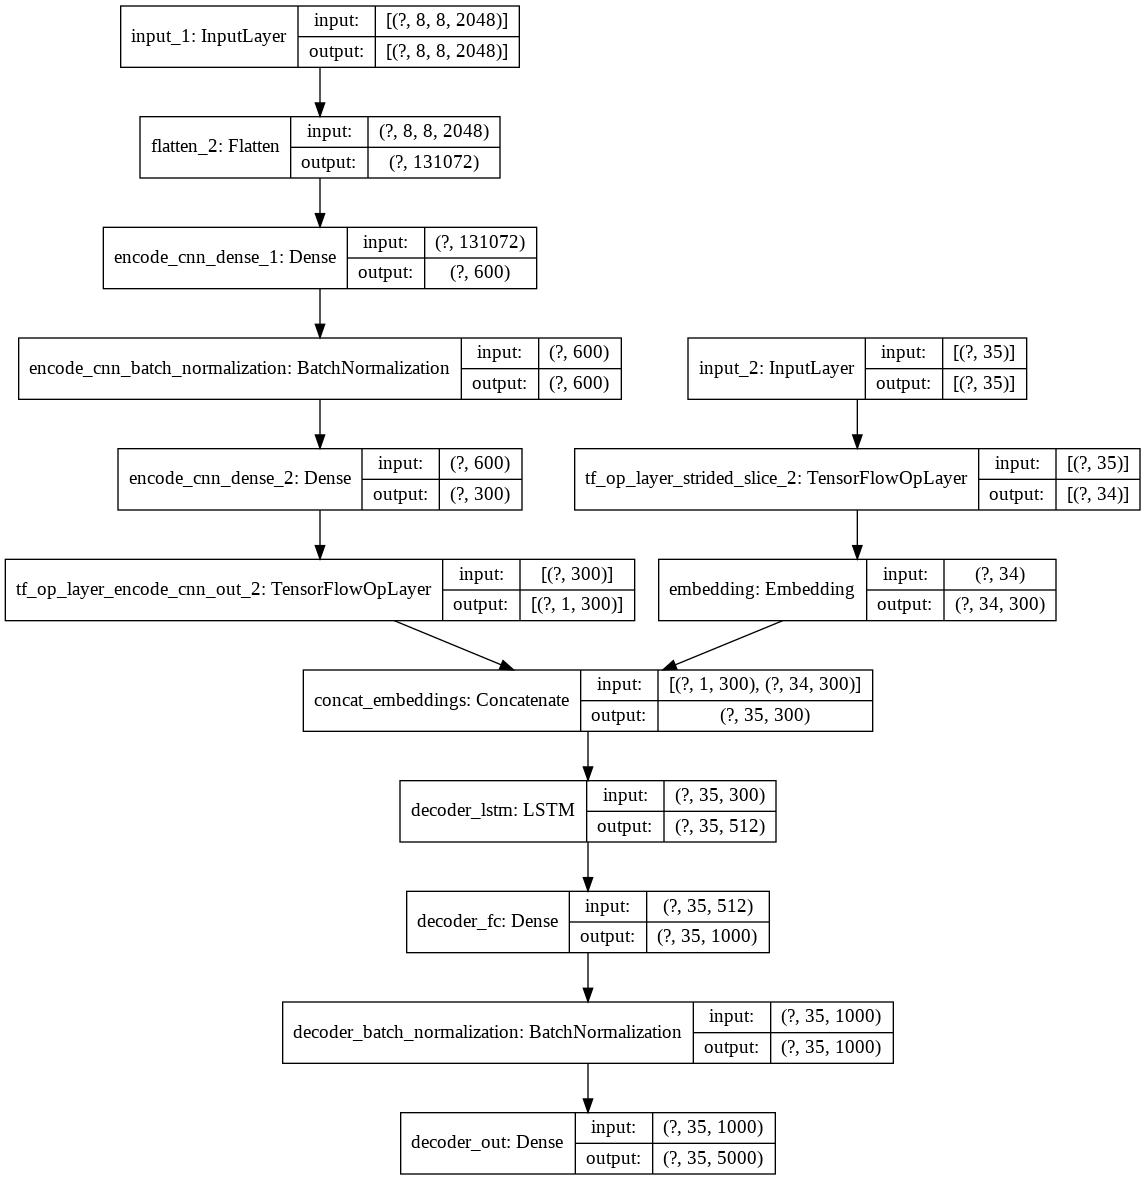

In [20]:
from tensorflow.keras import utils

# This is the primary model for generating the text. We added a few extra layers 
# and batch normalization to help with the training when a very small data set
# is used. It could possibly be better to remove them if the full data set is used
# but this generated better results.

SEQUENCE_LENGTH = sentence_length # = 35
EMBEDDING_SIZE = EMBEDDING_DIM # = 300
DICTIONARY_SIZE = 5000

# Encode CNN: Image representation -> Embedding
# The image should already be passed through a CNN at this step.
# We are using the output dimensions of the last concat layer of inception_v3
# as the input size here. Output shape (None, 1, 300)
image_input = tf.keras.layers.Input((8, 8, 2048), name="input_1")
encode_cnn_flattened = tf.keras.layers.Flatten()(image_input)
encode_cnn_dense_1 = tf.keras.layers.Dense(EMBEDDING_SIZE * 2, name="encode_cnn_dense_1", activation='relu')(encode_cnn_flattened)
encode_cnn_batch = tf.keras.layers.BatchNormalization(name="encode_cnn_batch_normalization")(encode_cnn_dense_1)
encode_cnn_dense_2 = tf.keras.layers.Dense(EMBEDDING_SIZE, name="encode_cnn_dense_2", activation='relu')(encode_cnn_batch)
encode_cnn_out = tf.expand_dims(encode_cnn_dense_2, 1, name="encode_cnn_out")  

# Input the sentence and create embedding from each word in it. Cut of the first word
# as that is going to be replaced by the image. This is always "<start>" which
# makes it unnecessary. Output dimension (None, 35 - 1, 300)
sentence_input = tf.keras.layers.Input((SEQUENCE_LENGTH, ), name="input_2")
encode_sentence_cut = sentence_input[:, :-1]
encode_sentence_out = embedding_layer(encode_sentence_cut)

# Adding the embeddings together such that the image embeding is the first input
# and the word embeddings for the sentence folows.
# Output dimension (None, 1, 300) + (None, 34, 300) = (None, 35, 300)
sequence_embedding = tf.keras.layers.Concatenate(axis=1, name="concat_embeddings")([encode_cnn_out, encode_sentence_out])

# Decoder model: Sequence of embeddings -> Sequence of one hot word outputs
# This takes the embeddings, passes them through a LSTM and FC layers to create
# 35 one hot encoded words with the dictionary size 5000.
# Output shape (None, 35, 5000)
decoder_lstm = tf.keras.layers.LSTM(512, return_sequences=True, name="decoder_lstm")(sequence_embedding)
decoder_fc = tf.keras.layers.Dense(1000, 'relu', name="decoder_fc")(decoder_lstm)
decoder_batch = tf.keras.layers.BatchNormalization(name="decoder_batch_normalization")(decoder_fc)
decoder_out = tf.keras.layers.Dense(DICTIONARY_SIZE, 'softmax', name="decoder_out")(decoder_batch)

# Creating the model with optimizer and loss function
optimizer = tf.keras.optimizers.RMSprop(lr=1e-3)
loss_function = tf.keras.losses.SparseCategoricalCrossentropy()

show_and_tell = tf.keras.Model(inputs=[image_input, sentence_input], outputs=[decoder_out], name="show_and_tell")
show_and_tell.compile(optimizer, loss_function, metrics=['accuracy'])

# Some stats
print(show_and_tell.input_shape)
print(show_and_tell.output_shape)
show_and_tell.summary()
utils.plot_model(show_and_tell, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [44]:
# Training
show_and_tell.fit(dataset, epochs=30)


Epoch 1/30
50/50 [==============================] - 12s 238ms/step - loss: 2.1519 - accuracy: 0.7012
Epoch 2/30
50/50 [==============================] - 9s 188ms/step - loss: 1.3093 - accuracy: 0.7619
Epoch 3/30
50/50 [==============================] - 9s 188ms/step - loss: 1.0845 - accuracy: 0.7821
Epoch 4/30
50/50 [==============================] - 9s 189ms/step - loss: 0.8917 - accuracy: 0.8017
Epoch 5/30
50/50 [==============================] - 9s 189ms/step - loss: 0.7293 - accuracy: 0.8206
Epoch 6/30
50/50 [==============================] - 9s 189ms/step - loss: 0.5968 - accuracy: 0.8421
Epoch 7/30
50/50 [==============================] - 9s 189ms/step - loss: 0.4955 - accuracy: 0.8608
Epoch 8/30
50/50 [==============================] - 10s 190ms/step - loss: 0.4099 - accuracy: 0.8793
Epoch 9/30
50/50 [==============================] - 9s 188ms/step - loss: 0.3451 - accuracy: 0.8952
Epoch 10/30
50/50 [==============================] - 9s 190ms/step - loss: 0.2910 - accuracy: 0.91

In [0]:
# Saving information to disk to make it easy to get up and running again

filename = '/content/drive/My Drive/model.ckpt'
# show_and_tell.save_weights(filename)

show_and_tell.load_weights(filename)

In [0]:
import matplotlib.pyplot as plt

SENTENCE_LENGTH = sentence_length # = 35

def evaluate(image, true_caption):

    # Load image data and prepare it for model
    inception_raw_image = inception_preprocess(image)[0]
    img = tf.expand_dims(inception_raw_image, 0)
    img_input = inception_model(img)

    # Construct state collection
    sentence_input = np.zeros(shape=(1, SENTENCE_LENGTH), dtype=np.float)
    token_id = tokenizer.word_index['<start>']
    last_token_id = token_id # Tracking the last word to remove duplicate words
    token_count = 0
    sentence = []
    stop_word = tokenizer.word_index['<end>\n']

    # Continue to extend the input sequence with the newly predicted words
    # until we reach the stop.
    while token_count < SENTENCE_LENGTH and token_id != stop_word:
      # Update the current token
      sentence_input[0, token_count] = token_id
      
      # Get prediction
      prediction = show_and_tell.predict({"input_1": img_input, "input_2": sentence_input})
      
      # Grabing the maximum of the alternatives at this point
      token_id = np.argmax(prediction[0, token_count, :])
      
      # Appending the new token
      if (token_id not in set([last_token_id, tokenizer.word_index['<end>\n']])):
        sentence.append(token_id)

      last_token_id = token_id

      token_count += 1

    # Cleaning up the real sentence
    true_sentence = []
    remove_set = set([tokenizer.word_index['<start>']])
    
    for word in true_caption:
      if word == stop_word:
        break
      if word not in remove_set:
        true_sentence.append(word)

    print('Predicted caption:\t',tokenizer.sequences_to_texts([sentence]))
    print('True captions:\t\t',tokenizer.sequences_to_texts([true_sentence]))
    
    # Show image. The inception format has pixel values between -1 and 1 while 
    # matplotlib want them between 0 and 1
    real_image = np.squeeze((inception_raw_image + 1) / 2)
    plt.imshow(real_image)

def run_evaluation(i):
  evaluate(test_name[i], test_caption[i])

Predicted caption:	 ['a <unk> group of spectators people enjoying are a sitting boy watching <unk> a <unk>']
True captions:		 ['a group of people waiting outside a fenced in area']


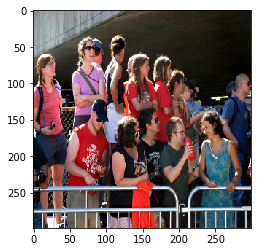

In [36]:
run_evaluation(1)

Predicted caption:	 ['a man with wearing four dogs running in the background']
True captions:		 ['a smiling woman watches as four dogs run on a hill']


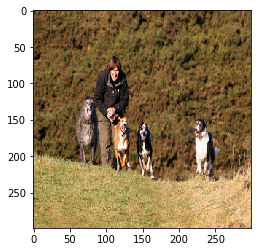

In [37]:
run_evaluation(2)

Predicted caption:	 ['a teenage man boy doing on a his skateboard while']
True captions:		 ['a skateboarder is in midair in the middle of a trick']


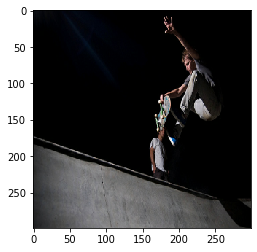

In [38]:
run_evaluation(3)

Predicted caption:	 ['the a girl group is wearing a purple shirt']
True captions:		 ['girls sit on benches']


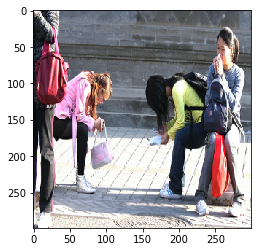

In [39]:
run_evaluation(4)

Predicted caption:	 ['a woman group in a the brown snow jacket']
True captions:		 ['an older woman with a small dog in the snow']


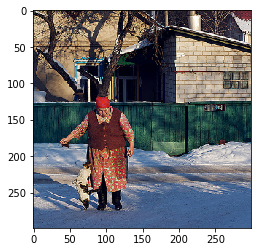

In [40]:
run_evaluation(5)

Predicted caption:	 ['a on toddler a is wooden sitting horse many']
True captions:		 ['a small boy rides a wooden toy and smiles']


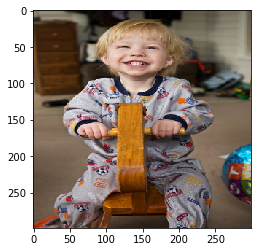

In [41]:
run_evaluation(6)

Predicted caption:	 ['a brown and white dog in a grassy area']
True captions:		 ['a black and white dog biting onto a chunk of ice']


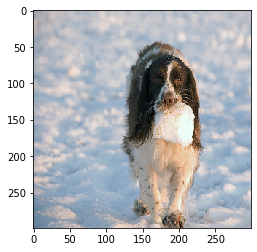

In [42]:
run_evaluation(7)

Predicted caption:	 ['big <unk> dog trying with to its bite mouth in the grass']
True captions:		 ['two brown dogs fighting each other']


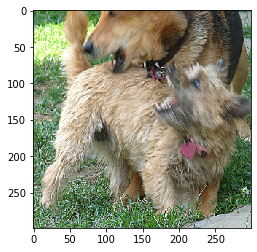

In [43]:
run_evaluation(8)

Predicted caption:	 ['a <unk> group of people are in a field']
True captions:		 ['a crowd of people are sitting in seats in a sports ground bleachers']


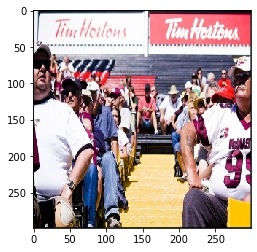

In [44]:
run_evaluation(9)

Predicted caption:	 ['a black running is']
True captions:		 ['a shiny black dog runs on the grass during a bright and sunny day']


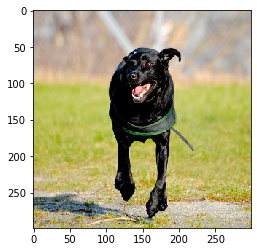

In [46]:
run_evaluation(11)

Predicted caption:	 ['a people group sitting in on a grassy area']
True captions:		 ['people outside sitting on the grass under cherry blossom trees']


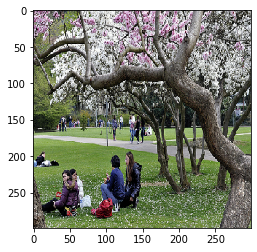

In [47]:
run_evaluation(12)

Predicted caption:	 ['two dogs run in the park background']
True captions:		 ['two dogs are playing on the beach together']


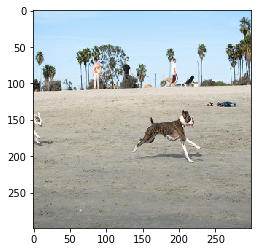

In [48]:
run_evaluation(13)

Predicted caption:	 ['a man wearing a white hardhat headband and stands a on behind a steps boat']
True captions:		 ['a man is taking photos with a long range lens by a body of water']


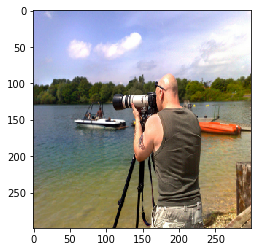

In [49]:
run_evaluation(14)

Predicted caption:	 ['a man playing in the a water child while wearing a red shirt bucket']
True captions:		 ['boy plays in fountain while man holds his hands']


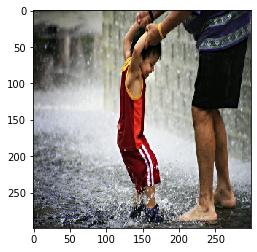

In [51]:
run_evaluation(16)